# Analysis of Data

Plotting time!!!

Twitter Data Format:
- tweet_id: int
- date: str (MM-DD-YYYY)
- epochtime: long (in milliseconds)
- content: str 
- hashtags: list(string)
- like_count: int
- retweet_count: int
- reply_count: int
- user: str
- is_reply: boolean
- real_or_fake: boolean
- news_or_claim: boolean
- \+
- real_or_fake
- date
- claim_id
- tweet_id
- **or**
- news_id
- date
- real_or_fake
- tweet_id

## Claim Analysis:
Can refuting fake news make a difference over time?

In [12]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import datetime

sns.__version__

'0.11.2'

In [16]:
df_claim_twitter_api = pd.read_csv("twitterAPIData/claim_twitter.csv")
df_claim_twitter_local = pd.read_csv("data/unifiedCSVs/raw_claim_twitter.csv")

df_claim = df_claim_twitter_local.drop(columns=["date", "real_or_fake"]).merge(df_claim_twitter_api, left_on='tweet_id', right_on='tweet_id', how="right")

df_claim.to_csv("claim_and_twitter.csv")

df_claim

,claim_id,tweet_id,date,epochtime,content,hashtags,like_count,retweet_count,reply_count,user,is_reply,real_or_fake,news_or_claim
0,100338,1298960028897079297,08-27-2020,1.598546e+12,So you come in here WITHOUT A MASK YOUR CHIL...,NaN,0,1,0,321206747,False,real,claim
1,100338,1298843581596262401,08-27-2020,1.598518e+12,SOMETHING SEEMINGLY ILLOGICAL: When I watch fa...,NaN,0,0,0,2302626632,False,real,claim
2,100338,1298802468730667008,08-27-2020,1.598508e+12,"Question of the Day: ""What type of masks shoul...",facemask|kidsmask|questionoftheday|cdcguideline,0,0,0,1287785895878262784,False,real,claim
3,100342,1298802468730667008,08-27-2020,1.598508e+12,"Question of the Day: ""What type of masks shoul...",facemask|kidsmask|questionoftheday|cdcguideline,0,0,0,1287785895878262784,False,real,claim
4,100338,1298551702061228033,08-26-2020,1.598448e+12,Just to be clear...WHO and UNICEF advise that ...,NaN,1,0,0,344833,False,real,claim
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17720,100367,1310973543375491072,09-29-2020,1.601410e+12,@FranksBullitts I saw a video a few months ago...,NaN,1,1,3,10975642,True,real,claim
17721,100367,1310975265141530624,09-29-2020,1.601410e+12,@msluser That is what I must have seen! Intere...,NaN,0,0,1,36860715,True,real,claim
17722,100367,1310975338487246848,09-29-2020,1.601410e+12,@FranksBullitts Frank not the one you were lo...,NaN,2,1,1,735809853831012352,True,real,claim
17723,100367,1310987368871075842,09-29-2020,1.601413e+12,@LewyLewyLewLew Thanks,NaN,0,0,0,36860715,True,real,claim


In [19]:
# Count of real and fake tweets per day sumed over all claims
# Also relative plots
sns.set_theme(style="whitegrid")

df_claim_groups = df_claim.groupby(["claim_id"])

df_aggregate_fake = pd.DataFrame()
df_aggregate_real = pd.DataFrame()

print(len(df_claim_groups))

for name, group in df_claim_groups:
  # print(group.shape[0])

  if group.shape[0] > 3:
    try:
      min_epoch_time = group["epochtime"].min()

      group["epochtime"] = group["epochtime"] - min_epoch_time

      group["days_since_start"] = np.round(group["epochtime"]/(1000 * 60 * 60 * 24)).astype(int)

      group_fake = group[group['real_or_fake'] == 'fake']
      group_real = group[group['real_or_fake'] == 'real']

      df_aggregate_fake = df_aggregate_fake.append(group_fake, ignore_index=True)
      df_aggregate_real = df_aggregate_real.append(group_real, ignore_index=True)

      # fig, ax = plt.subplots(figsize=(14, 8))
      # plt.xlabel("Days Since First Post")
      # plt.ylabel("Count of Tweets and Replies")
      # plt.title(f'Distribution of Tweets and Replies Made About Fake Claims Over Time for Claim {name} (n={group_fake.shape[0] + group_real.shape[0]})', fontsize=18)
      # sns.histplot(group_real, kde=True, alpha=.8, x="days_since_start", binwidth=2, ax=ax)
      # ax2 = ax.twinx()
      # sns.histplot(df_aggregate_fake, kde=True, alpha=1, x="days_since_start", binwidth=2, ax=ax2, color="#C5472C")
      # # sb.regplot(x='round', y='dead', data=firm,)
      # plt.show()

      plt.figure(figsize=(14, 8))
      ax = sns.histplot(group_fake, kde=True, x="days_since_start", binwidth=2, color="red")
      plt.xlabel("Days Since First Post")
      plt.ylabel("Count of Tweets and Replies")
      plt.title(f'Distribution of Tweets and Replies Made About Real Claims Over Time for Claim {name} (n={group_fake.shape[0]})', fontsize=18)
      plt.plot()

      plt.figure(figsize=(14, 8))
      ax = sns.histplot(group_real, kde=True, x="days_since_start", binwidth=2)
      plt.xlabel("Days Since First Post")
      plt.ylabel("Count of Tweets and Replies")
      plt.title(f'Distribution of Tweets and Replies Made About Real Claims Over Time for Claim {name} (n={group_real.shape[0]})', fontsize=18)
      plt.plot()
    except Exception as e:
      print(e)
    # break


print(f'Mean Fake Like Count: {df_aggregate_fake["like_count"].mean()}')
print(f'Mean Fake Retweet Count: {df_aggregate_fake["retweet_count"].mean()}')

print(f'Mean Real Like Count: {df_aggregate_real["like_count"].mean()}')
print(f'Mean Real Retweet Count: {df_aggregate_real["retweet_count"].mean()}')

plt.figure(figsize=(14, 8))
ax = sns.histplot(df_aggregate_fake, kde=True, x="days_since_start", binwidth=2, color="red", weights=df_aggregate_fake["like_count"].values)
plt.xlabel("Days Since First Post")
plt.ylabel("Count of Tweets and Replies")
plt.title(f'LIKE Distribution of Tweets and Replies Made About Fake Claims Over Time (n={df_aggregate_fake.shape[0]})', fontsize=18)
plt.plot()

plt.figure(figsize=(14, 8))
ax = sns.histplot(df_aggregate_real, kde=True, x="days_since_start", binwidth=2, weights=df_aggregate_real["like_count"].values)
plt.xlabel("Days Since First Post")
plt.ylabel("Count of Tweets and Replies")
plt.title(f'LIKE Distribution of Tweets and Replies Made About Real Claims Over Time (n={df_aggregate_real.shape[0]})', fontsize=18)
plt.plot()
plt.show()



plt.figure(figsize=(14, 8))
ax = sns.histplot(df_aggregate_fake, kde=True, x="days_since_start", binwidth=2, color="red")
plt.xlabel("Days Since First Post")
plt.ylabel("Count of Tweets and Replies")
plt.title(f'retweet_count Distribution of Tweets and Replies Made About Fake Claims Over Time (n={df_aggregate_fake.shape[0]})', fontsize=18)
plt.plot()

plt.figure(figsize=(14, 8))
ax = sns.histplot(df_aggregate_real, kde=True, x="days_since_start", binwidth=2)
plt.xlabel("Days Since First Post")
plt.ylabel("Count of Tweets and Replies")
plt.title(f'retweet_count Distribution of Tweets and Replies Made About Real Claims Over Time (n={df_aggregate_real.shape[0]})', fontsize=18)
plt.plot()
plt.show()

fig, ax = plt.subplots(figsize=(14, 8))
plt.xlabel("Days Since First Post")
plt.ylabel("Count of Tweets and Replies")
plt.title(f'Distribution of Tweets and Replies Made About Fake Claims Over Time (n={df_aggregate_real.shape[0] + df_aggregate_fake.shape[0]})', fontsize=18)
sns.histplot(df_aggregate_real, kde=True, alpha=.8, x="days_since_start", binwidth=2, ax=ax)
ax2 = ax.twinx()
sns.histplot(df_aggregate_fake, kde=True, alpha=1, x="days_since_start", binwidth=2, ax=ax2, color="#C5472C")
# sb.regplot(x='round', y='dead', data=firm,)
plt.show()

fake_counts = df_aggregate_fake["days_since_start"].value_counts()
x_data_fake = fake_counts.index
y_data_fake = fake_counts.values

slope, intercept, r_value, p_value, std_err = stats.linregress(x_data_fake, y_data_fake)

# use line_kws to set line label for legend
plt.figure(figsize=(14, 8))
# plt.subplots_adjust(bottom=0.15)
# plt.xlabel("Days Since First Post")
# plt.ylabel("Count of Tweets and Replies")
plt.title(f'Distribution of Tweets and Replies Made About Fake Claims Over Time (n={df_aggregate_fake.shape[0]})', fontsize=18)
ax = sns.regplot(x=pd.Series(x_data_fake, name="Days Since First Post"), y=pd.Series(y_data_fake, name="Count of Tweets and Replies"), color='red', line_kws={'label':f"y={np.round(slope, 3)}x+{np.round(intercept, 3)}"})
ax.legend()
# plt.tight_layout()
plt.show()

real_counts = df_aggregate_real["days_since_start"].value_counts()
x_data_real = real_counts.index
y_data_real = real_counts.values

slope, intercept, r_value, p_value, std_err = stats.linregress(x_data_real, y_data_real)

# use line_kws to set line label for legend
plt.figure(figsize=(14, 8))
# plt.subplots_adjust(bottom=0.15)
# plt.xlabel("Days Since First Post")
# plt.ylabel("Count of Tweets and Replies")
plt.title(f'Distribution of Tweets and Replies Made About Real Claims Over Time (n={df_aggregate_real.shape[0]})', fontsize=18)
ax = sns.regplot(x=pd.Series(x_data_real, name="Days Since First Post"), y=pd.Series(y_data_real, name="Count of Tweets and Replies"), line_kws={'label':f"y={np.round(slope, 3)}x+{np.round(intercept, 3)}"})
ax.legend()
# plt.tight_layout()
plt.show()

134
`bins` must be positive, when an integer
`bins` must be positive, when an integer


/tmp/ipykernel_4661/912743081.py:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(14, 8))


`bins` must be positive, when an integer
`bins` must be positive, when an integer
`bins` must be positive, when an integer


In [ ]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="Day", y="Frequency", data=tips)
plt.title('Relative Frequency of Real and Fake Tweets for all Claims per Day')

In [ ]:
# Count of real and fake tweets per claim
# Also relative plots

sns.set_theme(style="whitegrid")
ax = sns.barplot(x="Day", y="Frequency", data=tips)
plt.title('Relative Frequency of Real and Fake Tweets for all Claims per Day')

In [ ]:
# Real and fake tweets average likes over time
# Real and fake tweets average retweets over time

## News Analysis:
Comparing the spread of real and fake news.

In [10]:
df_news_articles = pd.read_csv("data/news_with_dates.csv")
df_news_articles = df_news_articles.dropna(subset=['date'])

df_news_twitter_api = pd.read_csv("twitterAPIData/news_twitter.csv")
df_news_twitter_local = pd.read_csv("data/unifiedCSVs/raw_news_twitter.csv")

df_news = df_news_twitter_local.drop(columns=["date", "real_or_fake"]).merge(df_news_twitter_api, left_on='tweet_id', right_on='tweet_id', how='right')

df_news

/home/berk/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (0,6,7,8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,news_id,tweet_id,date,epochtime,content,hashtags,like_count,retweet_count,reply_count,user,is_reply,real_or_fake,news_or_claim
0,912.0,1293055689078853632.0,08-11-2020,1.597138e+12,I am a board certified internist with sub spec...,NaN,91.0,38,18,1652743814,False,fake,news
1,912.0,1291139259529744384.0,08-05-2020,1.596681e+12,July 31 at 8:40 AM Your post didn't follow our...,NaN,0.0,0,0,108117349,False,fake,news
2,912.0,1288959325981966336.0,07-30-2020,1.596161e+12,Hydroxychloroquine Zinc and Azithromycin are...,NaN,0.0,0,0,982335555634524161,False,fake,news
3,912.0,1288695178237272064.0,07-30-2020,1.596098e+12,Masks may not help completely but they can slo...,NaN,1.0,0,1,2915570708,False,fake,news
4,912.0,1288588802349363200.0,07-29-2020,1.596073e+12,WOW: Physicians have gathered in Whashington D...,WhiteCoatSummit,2.0,1,0,2989286755,False,fake,news
...,...,...,...,...,...,...,...,...,...,...,...,...,...
202743,NaN,1313566535504588802,10-06-2020,1.602028e+12,BREAKING: Eddie Van Halen dies of throat cance...,RIPEddieVanHalen,122.0,15,12,299896657,False,real,news
202744,NaN,1313563299670351873,10-06-2020,1.602027e+12,#BREAKING: Eddie Van Halen dies of cancer at a...,BREAKING,1.0,3,1,15670107,False,real,news
202745,NaN,1319572296319774720,10-23-2020,1.603460e+12,"Want to understand covid 19? Ignore all ""cases...",NaN,0.0,0,1,967037960574160896,False,real,news
202746,NaN,1316748475510542350,10-15-2020,1.602787e+12,Compared with other countries the US experien...,NaN,0.0,0,1,1623968611,False,real,news


678
68679


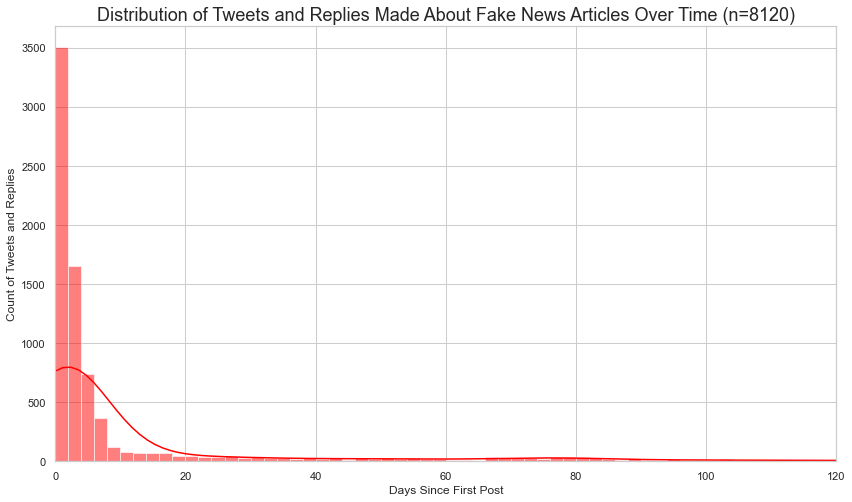

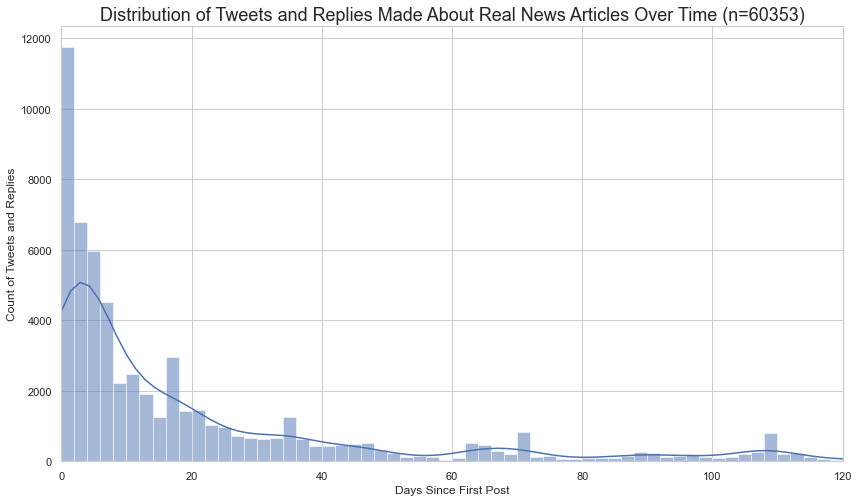

In [8]:
# Count of real and fake tweets per day sumed over all news
# Also relative plots
sns.set_theme(style="whitegrid")

df_news_groups = df_news.groupby(["news_id"])

df_aggregate_fake = pd.DataFrame()
df_aggregate_real = pd.DataFrame()

print(len(df_news_groups))
print(df_news.shape[0])

for name, group in df_news_groups:
  # print(group.shape[0])

  if group.shape[0] > 3:
    try:
      min_epoch_time = group["epochtime"].min()
      group["epochtime"] = group["epochtime"] - min_epoch_time

      group["days_since_start"] = np.round(group["epochtime"]/(1000 * 60 * 60 * 24)).astype(int)

      group_fake = group[group['real_or_fake'] == 'fake']
      group_real = group[group['real_or_fake'] == 'real']

      df_aggregate_fake = df_aggregate_fake.append(group_fake, ignore_index=True)
      df_aggregate_real = df_aggregate_real.append(group_real, ignore_index=True)

    except Exception as e:
      # print(e)
      pass


plt.figure(figsize=(14, 8))
ax = sns.histplot(df_aggregate_fake, kde=True, x="days_since_start", binwidth=2, color="red")
plt.xlabel("Days Since First Post")
plt.xlim(0, 120)
plt.ylabel("Count of Tweets and Replies")
plt.title(f'Distribution of Tweets and Replies Made About Fake News Articles Over Time (n={df_aggregate_fake.shape[0]})', fontsize=18)
plt.plot()

plt.figure(figsize=(14, 8))
ax = sns.histplot(df_aggregate_real, kde=True, x="days_since_start", binwidth=2)
plt.xlabel("Days Since First Post")
plt.xlim(0, 120)
plt.ylabel("Count of Tweets and Replies")
plt.title(f'Distribution of Tweets and Replies Made About Real News Articles Over Time (n={df_aggregate_real.shape[0]})', fontsize=18)
plt.plot()
plt.show()